In [1]:
import numpy as np

In [2]:
import h5py
import matplotlib.pyplot as plt

In [3]:
from tqdm.notebook import tqdm

In [4]:
# file_list = ['../results/360/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)] + \
#             ['../results/361/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)] + \
#             ['../results/362/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)] 


# file_list = ['../results/362/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)]

# file_list = ['../results/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(2880) ]

# file_list = ['../results/2022363_2023003/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(8640)]

In [5]:
#file_list = ['../results/362/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)]
file_list = ['../results/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(60)]
#file_list = ['../results/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)]

# file_list = ['../results/360/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)] + \
#             ['../results/361/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)] + \
#             ['../results/362/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)] 

# file_list += ['../results/2022363_2023003/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440*6)]

# file_list += ['../results/2023.004/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)]

# file_list += ['../results/2023.005/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440)]

# file_list += ['../results/2023006_2023013/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440*8)]

# file_list += ['../results/2023014_2023020/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440*7)]

# file_list += ['../results/2023021_2023025/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440*5)]


In [50]:
len(file_list) / 1440

0.041666666666666664

In [6]:
len(file_list)

60

In [12]:
import h5py
import numpy as np
from tqdm.notebook import tqdm



def read_file_and_get_xcorr(file):
    """
    Function to read the xcorr data from a single file.
    """
    with h5py.File(file, 'r') as fl:
        #print(fl['xcorr'].shape)
        return fl['xcorr'][0, 0, :, :]


# Usage

# for n in np.arange(0,len(file_list),1440):

#     file_list_tem = file_list[n:n+1440]

#     for i,f in tqdm(enumerate(file_list_tem)) :
#         fl = read_file_and_get_xcorr(f)
#         if i == 0 :
#             stack = fl
#         else:
#             stack += fl
#     #np.save('../results/stack/'+str(round(n/1440) + 1).zfill(2)+'_stack.npy',stack)


# for n in np.arange(0,len(file_list),1):

#     file_list_tem = file_list[:n]

#     for i,f in tqdm(enumerate(file_list_tem)) :
#         fl = read_file_and_get_xcorr(f)
#         if i == 0 :
#             stack = fl
#         else:
#             stack += fl
            
    #np.save('../results/stack/362/min_'+str(n).zfill(4)+'_stack.npy',stack)






file_list_tem = file_list[:]

for i,f in tqdm(enumerate(file_list_tem)) :
    fl = read_file_and_get_xcorr(f)
    if i == 0 :
        stack = fl
    else:
        stack += fl

0it [00:00, ?it/s]

In [13]:
#stack1 = stack
#stack += stack1

In [14]:
# for i,f in tqdm(enumerate(file_list)) :
#     with h5py.File(f,'r') as fl: 
#         if i == 0 :
#             stack = fl['xcorr'][0,0,:,:]
#         else:
#             stack += fl['xcorr'][0,0,:,:]

In [15]:
#stack = 0

In [16]:
stack.shape

(4096, 1500)

In [17]:
len(file_list)

60

In [18]:
15*25

375

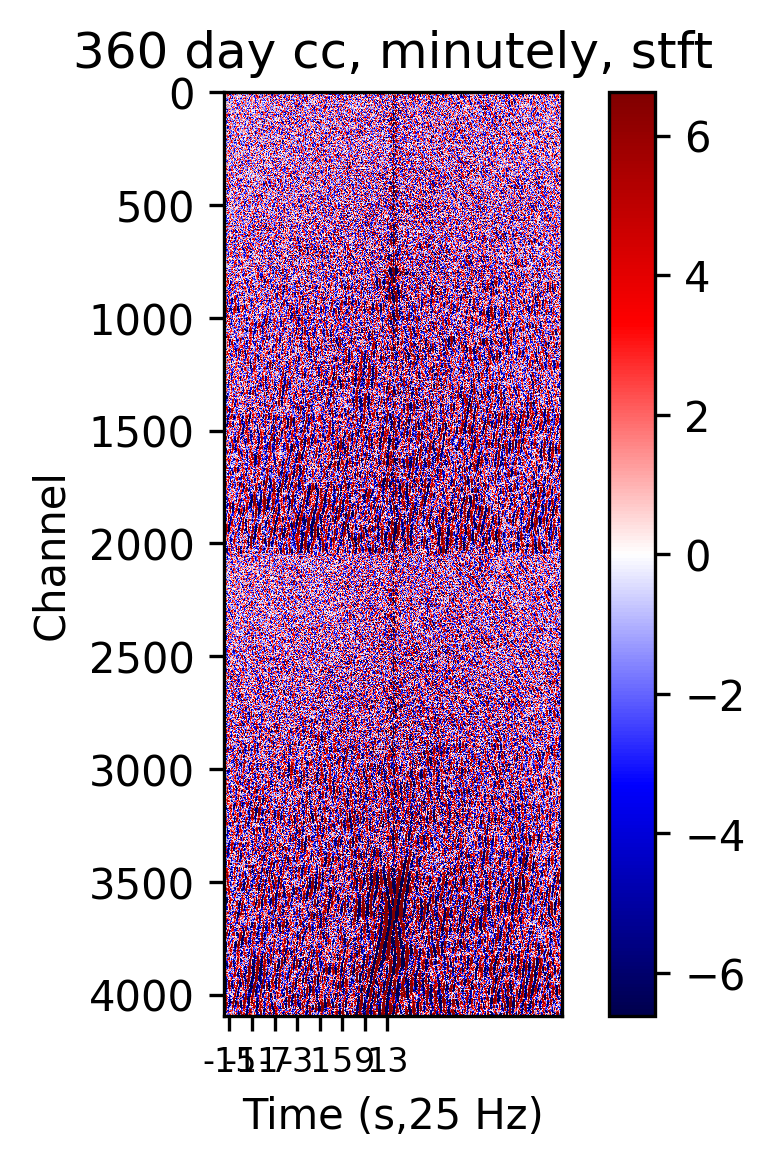

In [19]:
plt.figure(figsize=(4,4),dpi=300)

v = np.std(stack)/100

plt.imshow(stack[:,::]/60,vmin=-v,vmax=v,
           #vmin=-15,vmax=15,
#plt.imshow(stack[:,::]/len(file_list),vmin=-15,vmax=15,
           cmap='seismic')
           #vmin=np.percentile(stack,20),vmax=np.percentile(stack,80))
#plt.xlim([749-200,749+200])

#plt.xlim([749-250,749+250])
#plt.xticks(np.arange(749-250,749+250+1,50),[round(n) for n in np.arange(0-250,0+250+1,50) / 25])
#plt.xlim([6000-200*4,6000+200*4])
#plt.ylim([1023-512,1023+512])

plt.xticks(np.arange(399-15*25,399+15*25,100),[round(n) for n in np.arange(0-15*25,0+15*25,100) / 25])

plt.tick_params(axis='x', labelsize=8) 

plt.xlabel('Time (s,25 Hz)')
plt.ylabel('Channel')
#plt.colorbar()
plt.title('360 day cc, minutely, stft')
plt.colorbar()

In [121]:
###### single minute plot


for n in tqdm(np.arange(0,1440)):

    # if n == 0:
    #    stack = np.load('../results/stack/'+str(round(n/1440) + 1).zfill(2)+'_stack.npy')
    # else :
    #    stack += np.load('../results/stack/'+str(round(n/1440) + 1).zfill(2)+'_stack.npy') 

    stack = np.load('../results/stack/360/min_'+str(n).zfill(4)+'_stack.npy')

    plt.figure(figsize=(4,4),dpi=100)


    plt.imshow(stack[:,::]/(n+1),vmin=-15,vmax=15,
    #plt.imshow(stack[:,::]/(n+1440),vmin=-15,vmax=15,
               cmap='seismic')
               #vmin=np.percentile(stack,20),vmax=np.percentile(stack,80))
    #plt.xlim([749-200,749+200])
    
    plt.xlim([749-250,749+250])
    plt.xticks(np.arange(749-250,749+250+1,50),[round(n) for n in np.arange(0-250,0+250+1,50) / 25])
    #plt.xlim([6000-200*4,6000+200*4])
    #plt.ylim([511-500,511+500])
    
    plt.tick_params(axis='x', labelsize=8) 
    
    plt.xlabel('Time (s,25 Hz)')
    plt.ylabel('Channel')
    #plt.colorbar()
    plt.title('Day 360 '+str(n+1)+'mins cc, minutely')
    plt.colorbar()

    plt.tight_layout()

    #plt.savefig('../results/stack/figures/360/'+str(n+1).zfill(4)+'_mins_stack.jpg')

    plt.close()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1440/1440 [04:50<00:00,  4.96it/s]


In [107]:
for n in np.arange(0,len(file_list),1440):

    # if n == 0:
    #    stack = np.load('../results/stack/'+str(round(n/1440) + 1).zfill(2)+'_stack.npy')
    # else :
    #    stack += np.load('../results/stack/'+str(round(n/1440) + 1).zfill(2)+'_stack.npy') 

    stack = np.load('../results/stack/'+str(round(n/1440) + 1).zfill(2)+'_stack.npy')

    plt.figure(figsize=(4,4),dpi=300)


    plt.imshow(stack[:,::]/(1440),vmin=-15,vmax=15,
    #plt.imshow(stack[:,::]/(n+1440),vmin=-15,vmax=15,
               cmap='seismic')
               #vmin=np.percentile(stack,20),vmax=np.percentile(stack,80))
    #plt.xlim([749-200,749+200])
    
    plt.xlim([749-250,749+250])
    plt.xticks(np.arange(749-250,749+250+1,50),[round(n) for n in np.arange(0-250,0+250+1,50) / 25])
    #plt.xlim([6000-200*4,6000+200*4])
    #plt.ylim([511-500,511+500])
    
    plt.tick_params(axis='x', labelsize=8) 
    
    plt.xlabel('Time (s,25 Hz)')
    plt.ylabel('Channel')
    #plt.colorbar()
    plt.title('Day '+str(round(n/1440) + 1)+' cc, minutely')
    plt.colorbar()

    plt.tight_layout()

    #plt.savefig('../results/stack/figures/single_day/'+str(round(n/1440) + 1).zfill(2)+'_day_stack.jpg')

    plt.close()

In [75]:
#stack = np.load('../results/stack/20_stack.npy')

In [22]:
stack.shape
#stack[:,749-250:749+250].shape

(2048, 800)

In [23]:
stack

array([[ 0.05633147, -0.10472836, -0.31110507, ..., -0.1900305 ,
        -0.90978456, -0.5430332 ],
       [ 0.03114311, -0.15551607, -0.5873885 , ..., -0.05460503,
        -0.34297317,  0.1522125 ],
       [ 0.23542248, -0.25675067,  0.18350393, ..., -0.29754594,
        -0.47561827,  0.46195668],
       ...,
       [ 0.01949286,  0.00447115,  0.6400809 , ..., -0.12680069,
         0.48059374,  0.1860626 ],
       [ 0.0586271 , -0.20416117, -0.45003653, ...,  0.7004906 ,
        -0.2365987 , -0.17024827],
       [-0.644387  ,  0.3066029 , -0.62871295, ...,  0.4351585 ,
        -0.2819892 ,  0.06488687]], dtype=float32)

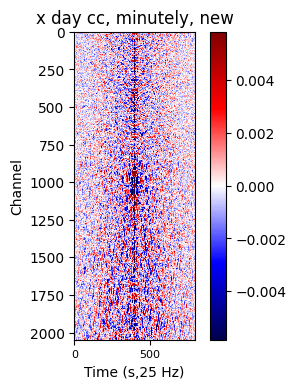

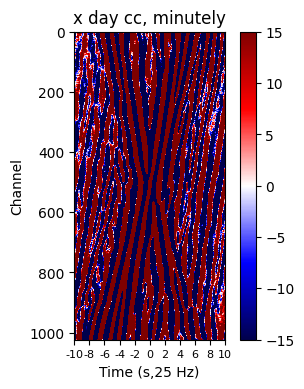

In [80]:
plt.figure(figsize=(4,4),dpi=100)

plt.imshow(stack[:,::]/1440,vmin=-15,vmax=15,
#plt.imshow(stack[:,::]/len(file_list),vmin=-15,vmax=15,
           cmap='seismic')
           #vmin=np.percentile(stack,20),vmax=np.percentile(stack,80))
#plt.xlim([749-200,749+200])

plt.xlim([749-250,749+250])
plt.xticks(np.arange(749-250,749+250+1,50),[round(n) for n in np.arange(0-250,0+250+1,50) / 25])
#plt.xlim([6000-200*4,6000+200*4])
#plt.ylim([511-500,511+500])

plt.tick_params(axis='x', labelsize=8) 

plt.xlabel('Time (s,25 Hz)')
plt.ylabel('Channel')
#plt.colorbar()
plt.title('x day cc, minutely')
plt.colorbar()

In [6]:
for n in tqdm(np.arange(1,32)):

    if n == 1:
       stack = np.load('../results/stack/'+str(n).zfill(2)+'_stack.npy')
    else :
       stack += np.load('../results/stack/'+str(n).zfill(2)+'_stack.npy') 

  0%|          | 0/31 [00:00<?, ?it/s]

In [14]:
25 * 60

1500

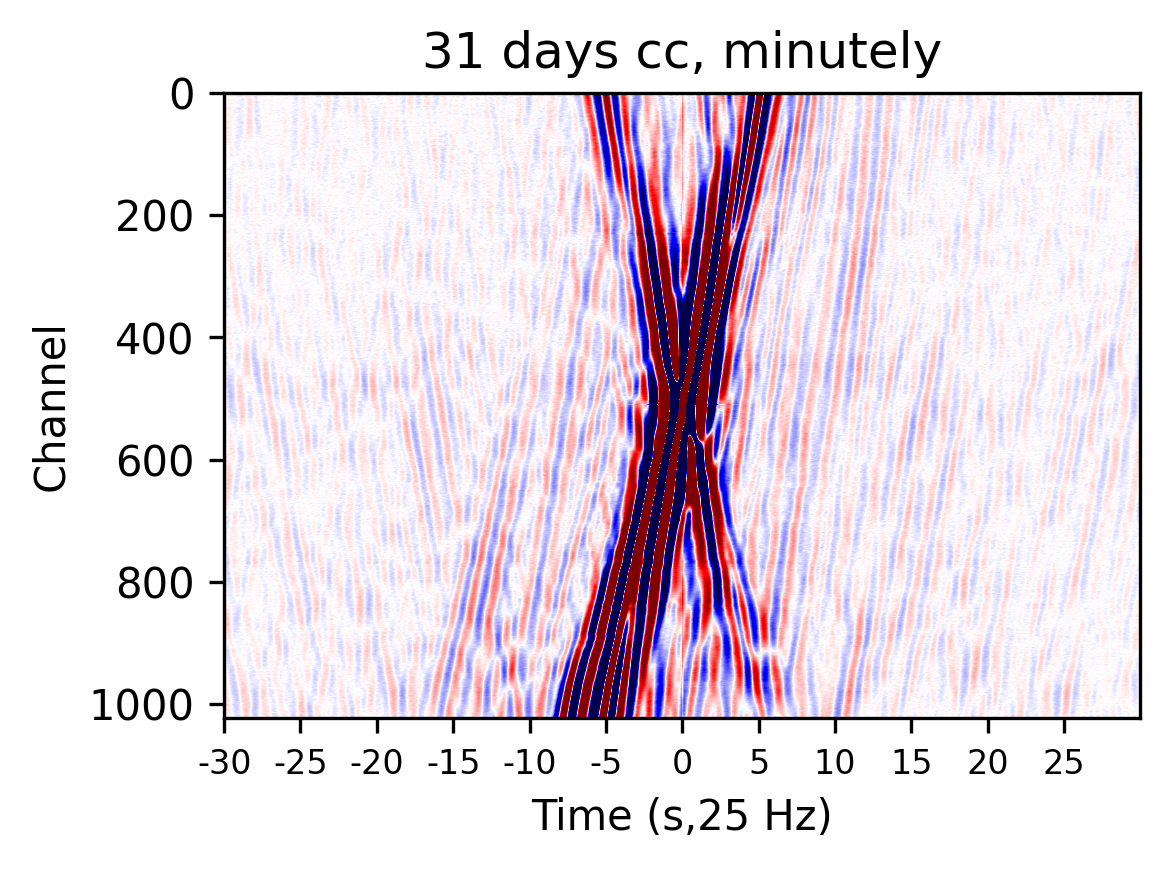

In [18]:

#stack = np.load('../results/stack/360/min_'+str(n).zfill(4)+'_stack.npy')
plt.figure(figsize=(4,4),dpi=300)
plt.imshow(stack[:,::]/(31*1440),vmin=-15,vmax=15,
#plt.imshow(stack[:,::]/(n+1440),vmin=-15,vmax=15,
           cmap='seismic')
           #vmin=np.percentile(stack,20),vmax=np.percentile(stack,80))
#plt.xlim([749-200,749+200])

#plt.xlim([749-250,749+250])
#plt.xticks(np.arange(749-250,749+250+1,50),[round(n) for n in np.arange(0-250,0+250+1,50) / 25])


plt.xticks(np.arange(0,1500,125),[round(n) for n in np.arange(0-750,0+750,125) / 25])
#plt.xlim([6000-200*4,6000+200*4])
#plt.ylim([511-500,511+500])

plt.tick_params(axis='x', labelsize=8) 

plt.xlabel('Time (s,25 Hz)')
plt.ylabel('Channel')
#plt.colorbar()
plt.title('31 days '+'cc, minutely')
#plt.colorbar()
plt.tight_layout()

In [42]:
np.save('../results/stack/2022360_2023003_stack.npy',stack)

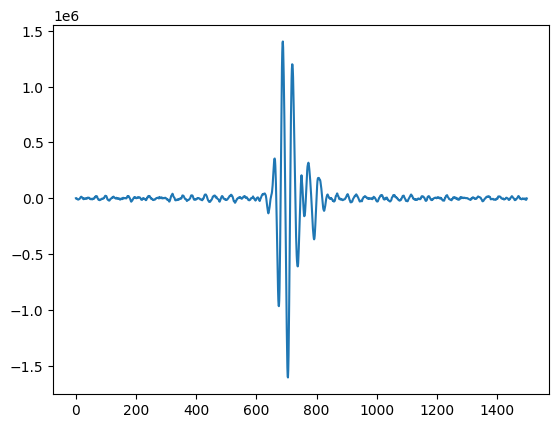

In [18]:
plt.plot(stack[700,::])

In [33]:
stack.shape

(1024, 1500)

In [17]:
#file_list = ['../results/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(2880) ]
#file_list = ['../results/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(12) ]
#file_list = ['../results/362/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(1440) ]
#file_list = ['../results/time_60s/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(2880) ]
#file_list = ['../results/time/AN_000_001_block_' + str(n).zfill(2) + '.h5' for n in range(24) ]

In [18]:
file_list_1 = file_list[::2]
file_list_2 = file_list[1::2]

In [19]:
for i,f in tqdm(enumerate(file_list_1)) :
    with h5py.File(f,'r') as fl: 
        if i == 0 :
            stack_1 = fl['xcorr'][0,0,:,:]
        else:
            stack_1 += fl['xcorr'][0,0,:,:]

0it [00:00, ?it/s]

In [20]:
stack_1.shape

(1024, 1500)

In [21]:
for i,f in tqdm(enumerate(file_list_2)) :
    with h5py.File(f,'r') as fl:
        if i == 0 :
            stack_2 = fl['xcorr'][0,0,:,:]
        else:
            stack_2 += fl['xcorr'][0,0,:,:]

0it [00:00, ?it/s]

In [22]:
stack_1.shape

(1024, 1500)

In [23]:
stack = np.concatenate((stack_1,stack_2))

In [24]:
stack.shape

(2048, 1500)

In [25]:
stack

array([[  494.8629  ,  1936.9078  ,  1740.2621  , ...,   201.45995 ,
         -936.2322  ,  -661.24976 ],
       [ 5257.2217  ,  5763.8477  ,  5306.493   , ..., -2208.9019  ,
        -1316.469   , -2026.3809  ],
       [-1067.2444  , -1864.8314  , -2848.47    , ...,  1269.7926  ,
          557.2162  , -1229.7567  ],
       ...,
       [ 1112.4456  ,   735.0625  ,   973.31934 , ...,   535.19055 ,
          345.39728 ,  1461.4823  ],
       [ 2400.1748  ,  2882.7234  ,  2230.2449  , ...,  -394.5846  ,
          -63.646507,  1073.6802  ],
       [ 1283.519   ,  2092.641   ,  3168.885   , ...,  1601.7383  ,
         1764.7748  ,  1623.3792  ]], dtype=float32)

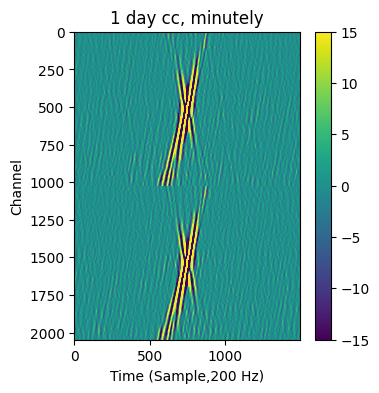

In [27]:
plt.figure(figsize=(4,4),dpi=100)
plt.imshow(stack[:,::]/len(file_list_1),vmin=-15,vmax=15)
#plt.xlim([749-200,749+200])
#plt.xlim([6000-200*4,6000+200*4])
#plt.ylim([511-500,511+500])

plt.xlabel('Time (Sample,200 Hz)')
plt.ylabel('Channel')
#plt.colorbar()
plt.title('1 day cc, minutely')
plt.colorbar()

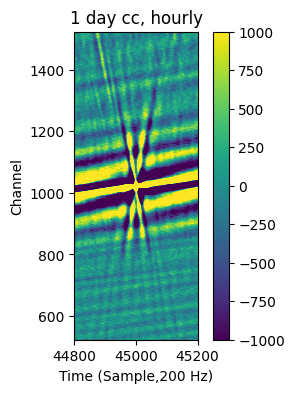

In [71]:
plt.figure(figsize=(4,4),dpi=100)
plt.imshow(stack[:,::]/len(file_list_1),vmin=-1000,vmax=1000)
#plt.xlim([749-200,749+200])
plt.xlim([45000 - 200,45000 + 200])
plt.ylim([1023-500,1023+500])

plt.xlabel('Time (Sample,200 Hz)')
plt.ylabel('Channel')

plt.title('1 day cc, hourly')
plt.colorbar()

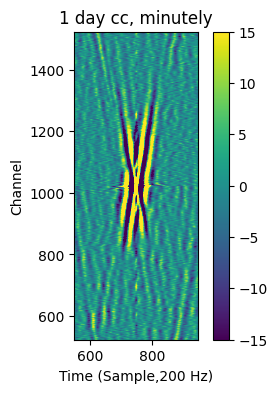

In [12]:
plt.figure(figsize=(4,4),dpi=100)
plt.imshow(stack[:,::]/len(file_list_1),vmin=-15,vmax=15)
plt.xlim([749-200,749+200])
plt.ylim([1023-500,1023+500])

plt.xlabel('Time (Sample,200 Hz)')
plt.ylabel('Channel')
#plt.colorbar()
plt.title('1 day cc, minutely')
plt.colorbar()

In [6]:
1500 / 25

60.0

In [47]:
1000/25

40.0

In [48]:
40 * 200

8000

In [4]:
file_list_1 = ['../results/time/AN_000_001_block_00.h5']

In [3]:
file_list_1 = ['../results/time/AN_000_001_block_00.h5',
               '../results/time/AN_000_001_block_02.h5',
               '../results/time/AN_000_001_block_04.h5',
               '../results/time/AN_000_001_block_06.h5',
               '../results/time/AN_000_001_block_08.h5',
               '../results/time/AN_000_001_block_10.h5',
               '../results/time/AN_000_001_block_12.h5',
               '../results/time/AN_000_001_block_14.h5',
               '../results/time/AN_000_001_block_16.h5',
               '../results/time/AN_000_001_block_18.h5',
               '../results/time/AN_000_001_block_20.h5',
               '../results/time/AN_000_001_block_22.h5',
               '../results/time/AN_000_001_block_24.h5',]

In [4]:
file_list_2 = ['../results/time/AN_000_001_block_01.h5',
               '../results/time/AN_000_001_block_03.h5',
               '../results/time/AN_000_001_block_05.h5',
               '../results/time/AN_000_001_block_07.h5',
               '../results/time/AN_000_001_block_09.h5',
               '../results/time/AN_000_001_block_11.h5',
               '../results/time/AN_000_001_block_13.h5',
               '../results/time/AN_000_001_block_15.h5',
               '../results/time/AN_000_001_block_17.h5',
               '../results/time/AN_000_001_block_19.h5',
               '../results/time/AN_000_001_block_21.h5',
               '../results/time/AN_000_001_block_23.h5']

In [5]:
stack_1 = np.zeros((1024,90000))
stack_2 = np.zeros((1024,90000))

In [5]:
for f in file_list_1 :

    with h5py.File(f,'r') as fl:

        
        stack_1 += fl['xcorr'][0,0,:,:]
    

NameError: name 'stack_1' is not defined

In [7]:
for f in file_list_2 :

    with h5py.File(f,'r') as fl:

        
        stack_2 += fl['xcorr'][0,0,:,:]

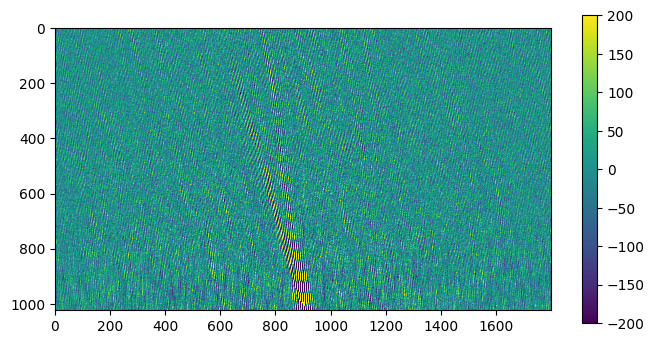

In [10]:
plt.figure(figsize=(8,4))
plt.imshow(stack_1[:,::50]/len(file_list_1),vmin=-200,vmax=200)
plt.colorbar()

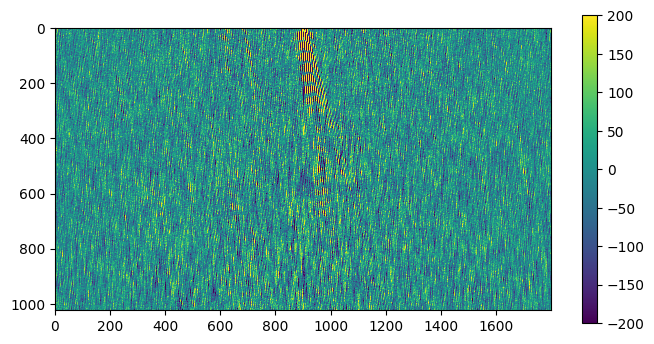

In [11]:
plt.figure(figsize=(8,4))
plt.imshow(stack_2[:,::50]/len(file_list_2),vmin=-200,vmax=200)
plt.colorbar()

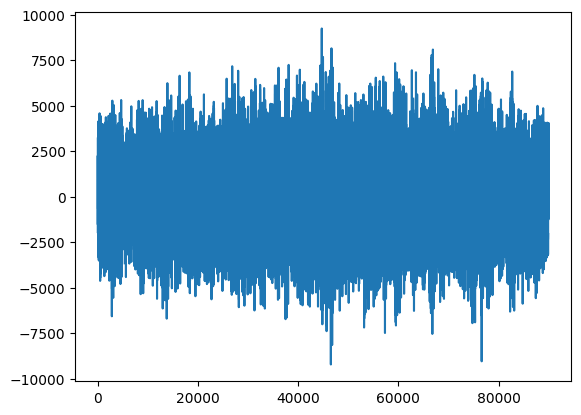

In [7]:
plt.plot(stack)

In [8]:
#a = h5py.File('../results/AN_000_001_block_00_0.h5','r')
a = h5py.File('../results/AN_000_001_block_01.h5','r')
#a = h5py.File('../results/AN_000_001_block_01.h5','r')

In [9]:
a['xcorr']

<HDF5 dataset "xcorr": shape (1, 1, 1024, 15000), type "<f4">

In [10]:
15000 / 25 

600.0

In [5]:
90000 / 25

3600.0

In [6]:
#a['pair_index'][0,:,511]

In [15]:
np.max(a['xcorr'][0,0,:,::50])

150758.44

In [14]:
np.min(a['xcorr'][0,0,:,::50])

-11263.734

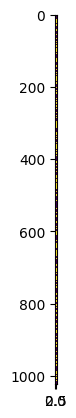

In [7]:
plt.imshow(a['xcorr'][0,0,:,::50],vmin=-200,vmax=200)
#plt.colorbar()

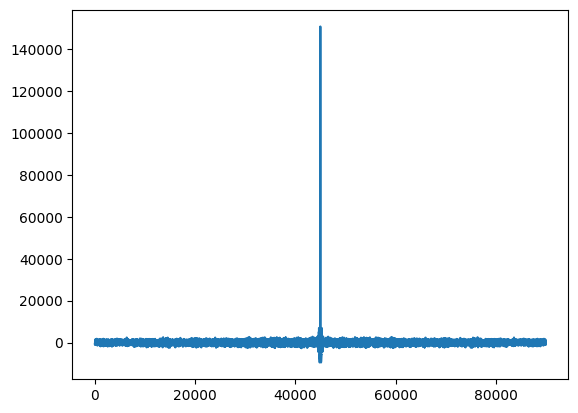

In [12]:
plt.plot(a['xcorr'][0,0,-1,:])

In [1]:
def read_pairs(self, pair_list):
        """
        Assume pair_list is a list of pairs of event indices
        """
        pair_list = np.loadtxt(pair_list, delimiter=",", dtype=np.int64)
        # For TEST
        # pair_list = np.array(list(itertools.product(range(6000), range(6000))))
        # pair_list = pair_list[pair_list[:, 0] < pair_list[:, 1]]
        # pair_list = pair_list[pair_list[:, 1] - pair_list[:, 0] < 10]
        unique_row = np.sort(np.unique(pair_list[:, 0]))
        unique_col = np.sort(np.unique(pair_list[:, 1]))
        print(f"Number of pairs: {len(pair_list)}, list1: {len(unique_row)}, list2: {len(unique_col)}")

        rows, cols = pair_list[:, 0], pair_list[:, 1]
        data = [True] * len(pair_list)
        shape = (max(rows) + 1, max(cols) + 1)
        pair_matrix = coo_matrix((data, (rows, cols)), shape=shape, dtype=bool)
        pair_matrix = pair_matrix.tocsr()

        row_index = coo_matrix((rows, (rows, cols)), shape=shape, dtype=int)
        row_index = row_index.tocsr()
        col_index = coo_matrix((cols, (rows, cols)), shape=shape, dtype=int)
        col_index = col_index.tocsr()

        return pair_matrix, row_index, col_index, unique_row, unique_col

In [38]:
pair_list = np.loadtxt('pairs_test.txt', delimiter=",", dtype=np.int64)

In [39]:
pair_list

array([[0, 1],
       [1, 0]])

In [40]:
pair_list.shape

(2, 2)

In [41]:
#pair_list = np.array([[0,1]])

In [42]:
unique_row = np.sort(np.unique(pair_list[:, 0]))
unique_col = np.sort(np.unique(pair_list[:, 1]))
print(f"Number of pairs: {len(pair_list)}, list1: {len(unique_row)}, list2: {len(unique_col)}")

Number of pairs: 2, list1: 2, list2: 2


In [43]:
unique_row

array([0, 1])

In [44]:
unique_col

array([0, 1])

In [45]:
from scipy.sparse import coo_matrix

In [46]:

# For TEST
# pair_list = np.array(list(itertools.product(range(6000), range(6000))))
# pair_list = pair_list[pair_list[:, 0] < pair_list[:, 1]]
# pair_list = pair_list[pair_list[:, 1] - pair_list[:, 0] < 10]

rows, cols = pair_list[:, 0], pair_list[:, 1]
data = [True] * len(pair_list)
shape = (max(rows) + 1, max(cols) + 1)
pair_matrix = coo_matrix((data, (rows, cols)), shape=shape, dtype=bool)
pair_matrix = pair_matrix.tocsr()
row_index = coo_matrix((rows, (rows, cols)), shape=shape, dtype=int)
row_index = row_index.tocsr()
col_index = coo_matrix((cols, (rows, cols)), shape=shape, dtype=int)
col_index = col_index.tocsr()


In [47]:
pair_matrix, row_index, col_index, unique_row, unique_col

(<2x2 sparse matrix of type '<class 'numpy.bool_'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <2x2 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <2x2 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 array([0, 1]),
 array([0, 1]))

In [48]:
print(pair_matrix)

  (0, 1)	True
  (1, 0)	True


In [49]:
print(row_index)

  (0, 1)	0
  (1, 0)	1


In [50]:
print(col_index)

  (0, 1)	1
  (1, 0)	0
